In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

In [18]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# y = np.array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

X = np.concatenate((np.ones((1,X.shape[1])),X),axis=0)
print(X)

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]]


In [19]:
def sigmoid(s):
    return 1/(1+np.exp(-s))
def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4):
    w = [w_init]
    i =0
    while i<100000:
        index  = np.random.randint(0,X.shape[1])
        y_i = y[index]
        x_i = X[:,index].reshape(X.shape[0],1)
        s = np.dot(w[-1].T,x_i)
        z_i = sigmoid(s)
        w_new = w[-1] + eta*(y_i-z_i)*x_i
        if np.linalg.norm(w_new-w[-1])<tol:
            break
        w.append(w_new)
        i+=1
    print(i)
    return w 
    
eta = .01 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

print(sigmoid(np.dot(w[-1].T, X)))

100000
[[-4.1966105 ]
 [ 1.53947204]]
[[0.03146605 0.04556383 0.0655504  0.0934457  0.13154093 0.18204783
  0.18204783 0.2464444  0.32458094 0.41388439 0.50923336 0.60391524
  0.69140023 0.76701668 0.87667116 0.91262738 0.93883208 0.95754312
  0.97070909 0.98621762]]


In [12]:

print(sigmoid(np.dot(w[-1].T,np.array([[1,1]]).T)))

[[0.03460603]]


In [15]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        # print(mix_id)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    print(count)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

10000
[[ 4.12012902]
 [-1.49497877]]


In [16]:

print(sigmoid(np.dot(w[-1].T, X)))

[[0.96683843 0.95252418 0.93246277 0.90477171 0.86734222 0.81815783
  0.81815783 0.75587054 0.68057745 0.59451983 0.50223434 0.40979636
  0.32332087 0.24744297 0.13472799 0.09677957 0.06867165 0.04829072
  0.03373948 0.01626639]]


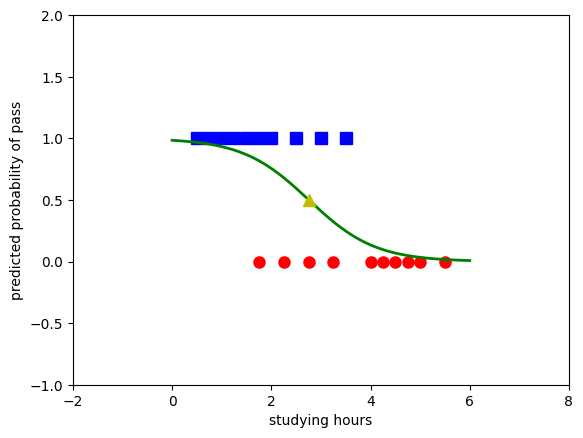

In [17]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()